# 通过生成人工数据集合，基于TensorFlow实现`y=3.1234*x+2.98`线性回归

通过生成人工数据集合，基于TensorFlow实现`y=3.1234*x+2.98`线性回归

通过上传附件方式提交 notebook文件（.ipynb）

评分标准：

1. 生成`x_data`，值为`[0, 100]`之间500个等差数列数据集合作为样本特征，根据目标线性方程`y=3.1234*x+2.98`，生成相应的标签集合`y_data`，1分；
2. 画出随机生成数据的散点图和想要通过学习得到的目标线性函数`y=3.1234*x+2.98`，1分；
3. 构建回归模型，3分；
4. 训练模型，10轮，每训练20个样本显示损失值，2分；
5. 通过训练出的模型预测`x=5.79` 时`y`的值，并显示根据目标方程显示的 y 值，1分；
6. 通过Tensorboard显示构建的计算图。

上传的源代码中有相应的源代码

结果计算图截图可以嵌入上交的notebook文件（.ipynb）

嵌入图片的方法为markdown cell中代码`<img src= "你的计算图文件名.png">`，2分。

备注：如果不是上传notebook文件（.ipynb），可以用以下方案替代：

1. 源代码 .py 文件
2. 写一个说明文档，贴上散点图和计算图的图形，格式可以是word或者pdf
3. 以上两个文件通过压缩文件打包为一个zip或者rar文件

强烈建议提交 notebook文件（.ipynb）（打包为压缩文件后上传）

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

# tf.enable_eager_execution()  # 在TensorFlow1.X版本中启用Eager Execution模式
tf.disable_eager_execution()  # 在TensorFlow2.X版本关闭Eager Execution
tf.__version__

'2.0.0-beta1'

1、生成`x_data`，值为`[0, 100]`之间500个等差数列数据集合作为样本特征，根据目标线性方程`y=3.1234*x+2.98`，生成相应的标签集合`y_data`，1分；

In [9]:
x_data = np.linspace(0, 100, 500)
y_data = 3.1234 * x_data + 2.98 + np.random.randn(500) * 0.5

2、画出随机生成数据的散点图和想要通过学习得到的目标线性函数`y=3.1234*x+2.98`，1分；

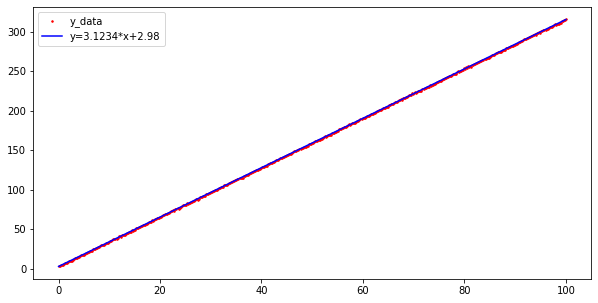

In [10]:
plt.figure(figsize=[10, 5])
plt.plot(x_data, y_data, 'r.', markersize=3)
plt.plot(x_data, 3.1234 * x_data + 2.98, 'b-')
plt.legend(['y_data', 'y=3.1234*x+2.98'])

3、构建回归模型，3分；

In [11]:
x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')
w = tf.Variable(1.0, name='w0')
b = tf.Variable(1.0, name='b0')
def model(x, w, b):
    return x * w + b
pred = model(x, w, b)

4、训练模型，10轮，每训练20个样本显示损失值，2分；

In [12]:
train_epochs = 10
learning_rate = 0.0001
display_step = 20
loss_function = tf.reduce_mean(tf.square(y - pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
sess = tf.Session()
init = tf.global_variables_initializer()
loss_list = []
step = 0
sess.run(init)
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})
        loss_list.append(loss)
        step += 1
        if step % display_step == 0:
            print(f'Train Epoch: {epoch+1:02d}, Step: {step:03d}, loss={loss:.9f}')

Train Epoch: 01, Step: 020, loss=105.663825989
Train Epoch: 01, Step: 040, loss=255.772567749
Train Epoch: 01, Step: 060, loss=270.711853027
Train Epoch: 01, Step: 080, loss=82.284751892
Train Epoch: 01, Step: 100, loss=7.499395847
Train Epoch: 01, Step: 120, loss=0.163116843
Train Epoch: 01, Step: 140, loss=0.292343050
Train Epoch: 01, Step: 160, loss=0.100833572
Train Epoch: 01, Step: 180, loss=0.502009988
Train Epoch: 01, Step: 200, loss=0.248971090
Train Epoch: 01, Step: 220, loss=0.011301387
Train Epoch: 01, Step: 240, loss=0.230454490
Train Epoch: 01, Step: 260, loss=0.301279306
Train Epoch: 01, Step: 280, loss=0.014541999
Train Epoch: 01, Step: 300, loss=0.555108666
Train Epoch: 01, Step: 320, loss=0.403857768
Train Epoch: 01, Step: 340, loss=0.515856087
Train Epoch: 01, Step: 360, loss=0.165982634
Train Epoch: 01, Step: 380, loss=0.000445333
Train Epoch: 01, Step: 400, loss=5.505974770
Train Epoch: 01, Step: 420, loss=1.669874668
Train Epoch: 01, Step: 440, loss=0.193897679
Tra

5、通过训练出的模型预测`x=5.79` 时`y`的值，并显示根据目标方程显示的 y 值，1分；

In [13]:
x_test = 5.79
y_hat = sess.run(model(x_test, w, b))
y_target = 3.1234 * x_test + 2.98
print(f'当x=5.79时，目标值为{y_target}，模型预测值为{y_hat}')

当x=5.79时，目标值为21.064486000000002，模型预测值为19.676916122436523


6、通过Tensorboard显示构建的计算图。

In [14]:
logdir = './'
tf.summary.FileWriter(logdir, tf.get_default_graph()).close()

**Tensorboard显示构建的计算图如下所示：**
![tensorboard](tensorboard.png)